In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np

conn = sqlite3.connect('../data/movies.db')

df_imdb_title_basics = pd.read_sql('''
select * from imdb_title_basics
''', conn)

df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idx              146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [2]:
df_original_null = df_imdb_title_basics.loc[df_imdb_title_basics['original_title'].isna()]
df_original_null.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
39095,39095,tt2397619,Woody Allen: A Documentary,None,2012,195.0,None
58624,58624,tt3414266,The Outer Loop,None,2013,78.0,None
62944,62944,tt3616658,The Hangman,None,2017,NaN,None
79274,79274,tt4548042,Urban Legend: The Blind Side Strangler,None,2016,NaN,None
80116,80116,tt4599436,Please Don't Eat the Pansies,None,2016,NaN,None


In [3]:
df_original_notnull = df_imdb_title_basics.loc[df_imdb_title_basics['original_title'].dropna().index]
df_original_notnull.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df_imdb_title_basics.loc[df_imdb_title_basics['original_title'].isna(), 'original_title'] = df_imdb_title_basics['primary_title']

In [5]:
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idx              146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146144 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [6]:
df_imdb_title_basics['runtime_minutes'].sort_values(ascending = False)

132389    51420.0
44840     14400.0
123467     6017.0
87264      6000.0
88717      5460.0
           ...   
146131        NaN
146138        NaN
146140        NaN
146141        NaN
146143        NaN
Name: runtime_minutes, Length: 146144, dtype: float64

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

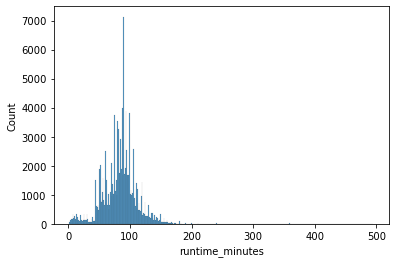

In [7]:
df_no_long = df_imdb_title_basics.loc[df_imdb_title_basics['runtime_minutes'] < 500]
sns.histplot(data = df_no_long['runtime_minutes'].dropna())

In [8]:
mode_runtime = float(df_imdb_title_basics['runtime_minutes'].mode())
df_imdb_title_basics['runtime_minutes'] = df_imdb_title_basics['runtime_minutes'].astype(float)
df_imdb_title_basics['runtime_minutes'].fillna(mode_runtime, inplace = True)

In [9]:
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idx              146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146144 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  146144 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [10]:
df_imdb_title_basics['genres'].fillna('None', inplace = True)

In [11]:
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idx              146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146144 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  146144 non-null  float64
 6   genres           146144 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [12]:
df_imdb_title_basics.to_csv(path_or_buf = '../data/cln_imdb_title_basics.csv')